In [1]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans():
    
    def __init__(self, K=5, n_iters=100, plot_steps=False):
        self.K = K
        self.n_iters = n_iters
        self.plot_steps = plot_steps

        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []
        
    def distance(x1,x2):
       return np.sqrt(np.sum((x1-x2)**2))

    def make_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self.most_near_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def converged_status(self,old_centroids,new_centroids):
        convergence=[KMeans.distance(old_centroids[i],new_centroids[i]) for i in range(self.K)]
        return sum(convergence)==0
    
    def most_near_centroid(self, sample, centroids):
        distances = [KMeans.distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index
    
    def get_labels(self,clusters):
        labels=np.empty(self.n_samples)
        for cluster_idx,cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx]=cluster_idx 

    
    def get_centroids(self,clusters):
        centroids=np.zeros((self.K,self.n_features))
        for idx, cluster in enumerate(clusters):
            cluster_mean=np.mean(self.X[cluster],axis=0)
            centroids[idx]=cluster_mean
        return centroids
        
    def make_predict(self,X):
        self.X=X
        self.n_samples,self.n_features=X.shape
        centroids_idxs=np.random.choice(self.n_samples,self.K,replace=False)
        self.centroids=[self.X[i] for i in centroids_idxs]
        for _ in range(self.n_iters):
            self.clusters=self.make_clusters(self.centroids)
        
            if self.plot_steps:
                self.plot()
                
            old_centroids=self.centroids
            self.centroids=self.get_centroids(self.clusters)  
            if self.converged_status(old_centroids,self.centroids):  
                break
            if self.plot_steps:
                self.plot()
        return self.get_labels(self.clusters)
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)
        plt.show()


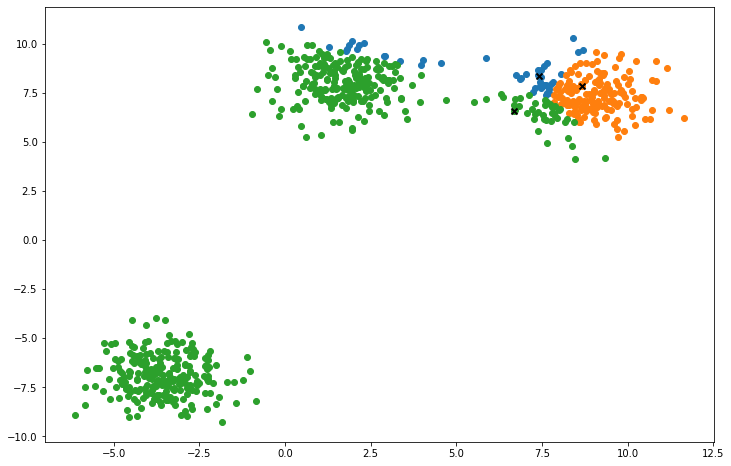

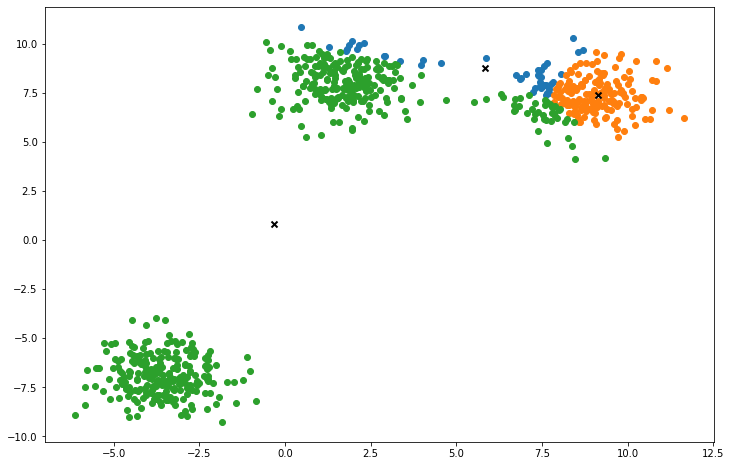

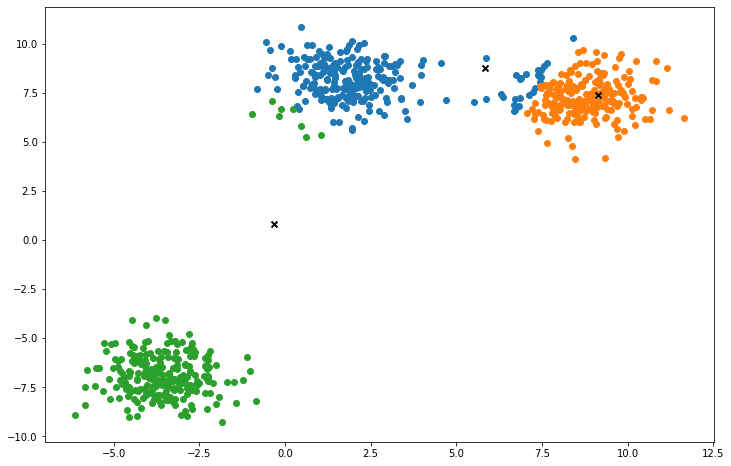

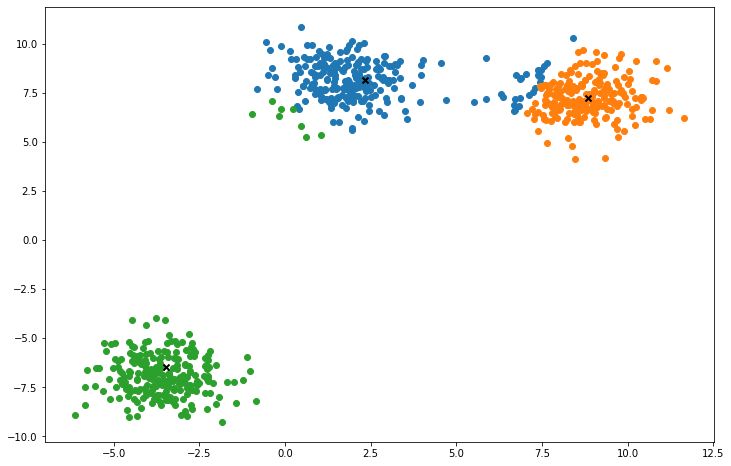

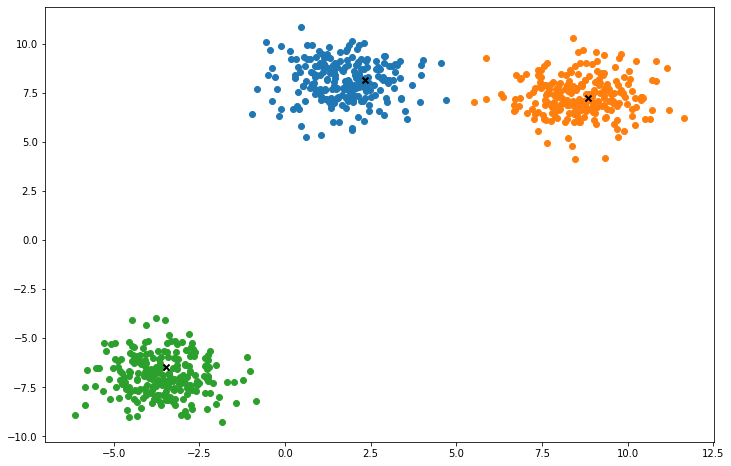

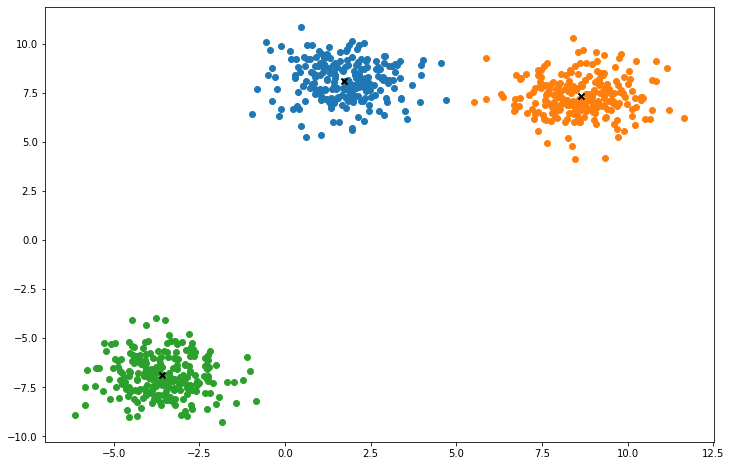

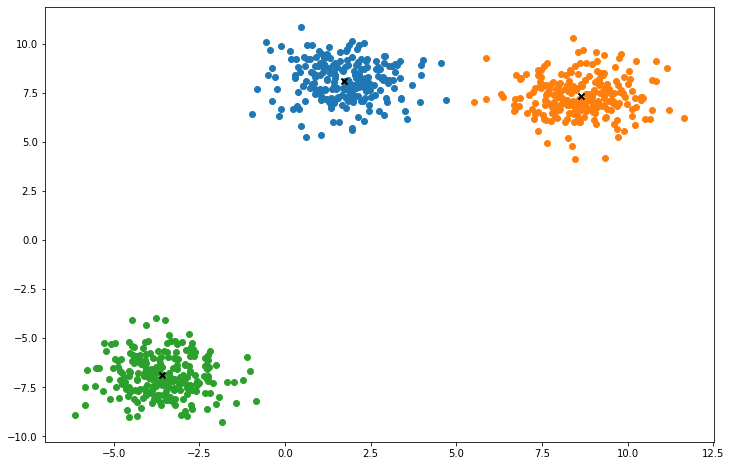

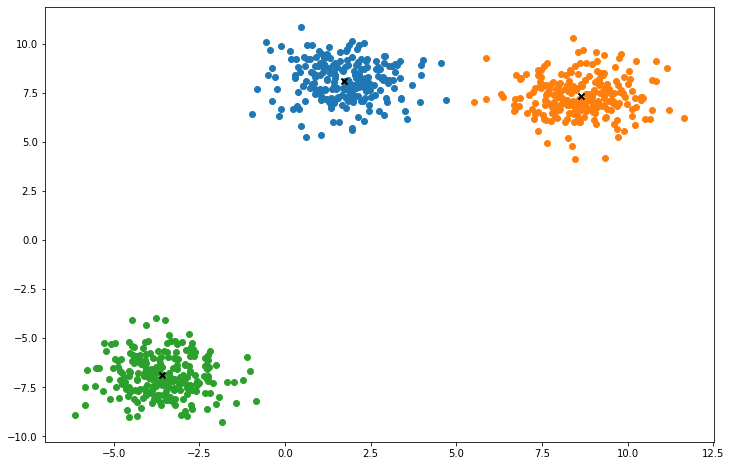

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=3, n_samples=700, n_features=2, shuffle=True, random_state=70)
clusters = len(np.unique(y))
k = KMeans(K=clusters, n_iters=150, plot_steps=True)
y_pred = k.make_predict(X)
k.plot()
